# Analysis of the European Cinema Industry compared to the real population of Europe

We will analyse the ethnicity, the gender proportions and the age representation.

In [1]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np
from scipy.stats import gaussian_kde

from europe_functions import *


In [2]:
# load preprocessed data
folder_CMU = './data/final/europe/CMU/'
folder_rw = './data/final/europe/real_world/'

##CMU
europe_df = pd.read_csv(folder_CMU+'europe_data.csv')
east_europe_df = pd.read_csv(folder_CMU+'east_europe_data.csv')
west_europe_df = pd.read_csv(folder_CMU+'west_europe_data.csv')
nordic_europe_df = pd.read_csv(folder_CMU+'nordic_europe_data.csv')

## real world
# Europe datasets
europe_avg_bothsexes = pd.read_csv(folder_rw+'bothsexes_europe_realworld_averages.csv')
europe_avg_female = pd.read_csv(folder_rw+'female_europe_realworld_averages.csv')
europe_prop_female = pd.read_csv(folder_rw+'female_europe_realworld_proportions.csv')
europe_avg_male = pd.read_csv(folder_rw+'male_europe_realworld_averages.csv')

# East Europe datasets
east_avg_bothsexes = pd.read_csv(folder_rw+'bothsexes_east_europe_realworld_averages.csv')
east_avg_female = pd.read_csv(folder_rw+'female_east_europe_realworld_averages.csv')
east_prop_female = pd.read_csv(folder_rw+'female_east_europe_realworld_proportions.csv')
east_avg_male = pd.read_csv(folder_rw+'male_east_europe_realworld_averages.csv')

# West Europe datasets
west_avg_bothsexes = pd.read_csv(folder_rw+'bothsexes_west_europe_realworld_averages.csv')
west_avg_female = pd.read_csv(folder_rw+'female_west_europe_realworld_averages.csv')
west_prop_female = pd.read_csv(folder_rw+'female_west_europe_realworld_proportions.csv')
west_avg_male = pd.read_csv(folder_rw+'male_west_europe_realworld_averages.csv')

# Nordic Europe datasets
nordic_avg_bothsexes = pd.read_csv(folder_rw+'bothsexes_nordic_europe_realworld_averages.csv')
nordic_avg_female = pd.read_csv(folder_rw+'female_nordic_europe_realworld_averages.csv')
nordic_prop_female = pd.read_csv(folder_rw+'female_nordic_europe_realworld_proportions.csv')
nordic_avg_male = pd.read_csv(folder_rw+'male_nordic_europe_realworld_averages.csv')


# establish dictionnaries and lists used 
regions = [
    ('Europe', europe_df),
    ('East Europe', east_europe_df),
    ('West Europe', west_europe_df),
    ('Nordic Europe', nordic_europe_df)
]


time_periods = {
    "All Periods": (1950, 2012),
    "1950-1965": (1950, 1965),
    "1966-1980": (1966, 1980),
    "1981-1995": (1981, 1995),
    "1996-2012": (1996, 2012)
}

# ethnicities
ethnicities = ['Caucasians', 'Arabs / Middle Easterns', 'Africans', 'South Asians', 'East Asians', 'Southeast Asian','Jewish People', 'Latinos', 'Indigenous People']

# Genres
genres = ['All Genres', 'Action/Adventure', 'Comedy', 'Drama', 'Thriller/Suspense', 'Horror', 
          'Science Fiction (Sci-Fi)', 'Fantasy', 'Romance', 'Documentary', 'Animation/Family']


# real-world proportions
real_world_proportions = {
    'Caucasians': 92.6,
    'Arabs / Middle Easterns': 2.98,
    'Africans': 2.4,
    'South Asians': 0.62,
    'East Asians': 0.25,
    'Southeast Asian': 0.28,
    'Latinos': 0.62,
    'Indigenous People': 0.043,
    'Jewish People': 0.27
}

genders = ['Both', 'Female', 'Male']


Due to complications and project complexity, we decided to not separate the europe df into sub-regions. We already have a lot of data to analyse and this would add a layer of complexity that we do not want.

In [3]:
europe_avg_female

,Time Period,0,1,2,3,4,5,6,7,8,...,91,92,93,94,95,96,97,98,99,100+
0,1950-1965,111.87,109.81,108.75,107.75,106.51,104.83,103.39,101.91,100.38,...,1.67,1.16,0.78,0.50,0.29,0.18,0.11,0.05,0.01,0.04
1,1966-1980,104.37,104.73,105.72,106.75,107.73,108.60,109.39,110.02,110.56,...,3.29,2.39,1.72,1.18,0.72,0.44,0.26,0.16,0.06,0.12
2,1981-1995,90.27,91.28,92.39,93.35,94.14,94.95,95.69,96.43,97.24,...,6.59,4.94,3.64,2.63,1.80,1.18,0.74,0.44,0.26,0.35
3,1996-2012,77.25,77.43,77.75,78.10,78.60,79.30,80.12,81.08,82.16,...,11.84,9.34,7.21,5.56,4.17,2.94,2.05,1.35,0.84,1.20


In [4]:
europe_df.head()

,movie_name,actor_name,age_at_release,actor_gender,actor_ethnicity_label,actor_height,release,box_office,runtime,languages,countries,genres,plot_summary,main_genre,region,actor_ethnicity_classification
0,Actrius,Rosa Maria Sardà,54.0,F,Spaniards,NaN,1996.0,NaN,90.0,"['Catalan language', 'Spanish Language']",['Spain'],"['Drama', 'Comedy-drama']",In order to prepare the role of an important o...,Comedy,west_europe,Caucasians
1,Actrius,Mercè Pons,29.0,F,Unknown,NaN,1996.0,NaN,90.0,"['Catalan language', 'Spanish Language']",['Spain'],"['Drama', 'Comedy-drama']",In order to prepare the role of an important o...,Comedy,west_europe,Unknown
2,Actrius,Anna Lizaran,51.0,F,Unknown,NaN,1996.0,NaN,90.0,"['Catalan language', 'Spanish Language']",['Spain'],"['Drama', 'Comedy-drama']",In order to prepare the role of an important o...,Comedy,west_europe,Unknown
3,Actrius,Núria Espert,60.0,F,Unknown,NaN,1996.0,NaN,90.0,"['Catalan language', 'Spanish Language']",['Spain'],"['Drama', 'Comedy-drama']",In order to prepare the role of an important o...,Comedy,west_europe,Unknown
4,Barry Lyndon,Steven Berkoff,38.0,M,Jewish people,1.75,1975.0,20000000.0,187.0,"['French Language', 'English Language', 'Germa...","['United States of America', 'United Kingdom']","['Costume drama', 'Film adaptation', 'Period p...",:By What Means Redmond Barry Acquired the Sty...,Drama,west_europe,Jewish People


## **Ethnicity Proportions**

As the real-world dataset didn't have good information about the ethnicity of the European Population, we decided to search for other datasets. However, Europe in itself doesn't have a complete dateset about ethnicities, it only had about nationalites which didn't interest us. They were a few countries (like England) that had complete datasets about it but not all countries had them and it even if they had, it would have been to much work to extract the data with our limited time.

Therefore, we chose to find already existing number on the web, here are the sources for each ethniciites. The sources may be unreliables so we searched for multiple sources and made an average. Many sources were also biased, especially for Arabs/Midlle Eastern which counted only Muslims and not Arabs in a whole (like the Christians lebanese for example)

- Wikipedia Page about [Ethnic Groups in Europe](https://en.wikipedia.org/wiki/Ethnic_groups_in_Europe) : 
    - Turks (Middle Eastern): 15 millions outside of Turkey and Northern Cyprus (2010) REMOVE TURKEY FROM THE DATASET
    - Jews: 2 million
    - Kurds (Middle Eastern): 2.5 million
    - North Africans (Arab): 5 miliion
    - Horn Africans (Black): 700 000
    - Sub-Sharan Africans (Black): 5 million (2007)
    - Latin American (Latinos): 2.2 million in 2007
    - South Asians: 3-4 millions
    - Southeast Asians: 2 million
    - East Asians: 1.7 million (Chinese) + 100 000 (Koreans)
- Wikipedia Page about [Arabs in Europe](https://en.wikipedia.org/wiki/Arabs_in_Europe#:~:text=In%202010%20the%20estimate%20of,%2C%20Norway%2C%20Finland%20and%20Greece.), from the 'Arab Dispora':
    - Arab/Middle Eastern (from arab speaking countries): 6 370 000
    - [European population in 2010](https://www.macrotrends.net/global-metrics/countries/eur/europe/population): 736 276 813
    --> That makes 0.865%
- [Institute for Jewish Policy Research](https://www.jpr.org.uk/countries/how-many-jews-in-europe):
    - 0.158%
- Institute for Cultural Diplomacy [ICD](https://www.culturaldiplomacy.org/index.php?en_programs_diaspora_eu):
    - Afro-descendants: 2.4% 
- [Latin Americans and Carribeans in Europe](https://ced.cat/wp-content/uploads/2019/03/InternationalMigration__2019_Bayona_Avila.pdf):
    - 2019: 4.64 million
    - European Pop in 2019: 746 189 645
    --> 0.62%
- European Parliement for the [International Year of Indegenous Languages](https://www.europarl.europa.eu/RegData/etudes/ATAG/2020/646118/EPRS_ATA(2020)646118_EN.pdf): 
    - 100 000


Combining these sources or chosing the most reliable one, we obtained the following percentages:

- Arabs/Middle Easterns: `2.98%`(taking the number for arab speaking people and turks)
- Jews: `0.16%` (taking the number from the Jewish Institute)
- Africans/Blacks: `2.4%` (taking the number from the Cultural Institute)
- Latinos: `0.62%`(taking the most recent number)
- South Asians: `0.62%`(gross estimate from wikipedia)
- Southeast Asians: `0.28%` (gross estimate from wikipedia)
- East Asians: `0.25%` (gross estimate from wikipedia)
- Indigenous: `0.043%`(gross estimate)
- Caucasians: `92.6%`(subracted from the other percentage)


In [5]:
import dash
from dash import dcc, html, Input, Output
import plotly.graph_objects as go


# Initialize the Dash app
app = dash.Dash(__name__)

# Layout of the app
app.layout = html.Div([
    html.H1('Comparison of Ethnicity Proportions by Genre in Europe'),

    # Dropdown for selecting genre
    html.Div([
        html.Label('Genre:'),
        dcc.Dropdown(
            id='genre-dropdown',
            options=[{'label': g, 'value': g} for g in genres],
            value='All Genres'
        ),
    ], style={'width': '25%', 'display': 'inline-block', 'padding': '10px'}),

    # Div to hold the graph
    dcc.Graph(id='grouped-ethnicity-plot')
])

# Callback to update the graph based on dropdown value
@app.callback(
    Output('grouped-ethnicity-plot', 'figure'),
    [Input('genre-dropdown', 'value')]
)
def update_plot(genre):
    # Call the function to generate the figure for Europe based on the selected genre
    return ethnicity_comparison_plot(europe_df, real_world_proportions, ethnicities, genre)

# Run the Dash app
if __name__ == '__main__':
    app.run_server(debug=True)


### Statistical Significance

Let's now quantify our uncertainty using a chi-squared proportion test:

$$\chi^2 = \sum \frac{(O_i - E_i)^2}{E_i}$$


In [6]:
results = chi_squared_ethnicity_test(europe_df, ethnicities, real_world_proportions)
print(results)

{'Chi-Squared Statistic': 125945.36581700131, 'Degrees of Freedom': 8, 'P-Value': 0.0, 'Conclusion': 'The proportions are significantly different.'}


- Null Hypothesis ($H_0$): The observed proportions of ethnicities match the real-world proportions.

- Alternative Hypothesis ($H_a$): The observed proportions of ethnicities do not match the real-world proportions.

Since the p-value is 0.0, we reject the null hypothesis. This means there is strong evidence that the observed distribution of ethnicites differs significantly from the expected distribution.

### Practical significance 

[Reddit Post ](https://www.reddit.com/r/statistics/comments/10ywamd/q_hypothesis_testing_when_sample_sizes_are/)

[Effect size](https://www.scribbr.com/statistics/effect-size/)

No can do here because we don't have a linear relashionship or the mean of the two groups
!!!!!! Explain with conf intervals

### Analysis


The plot comparing ethnicity proportions in European cinema to real-world population data shows interesting trends. While some ethnic groups seems to be represented similarly to their actual population distribution, others reveal disparities. 
A chi-squared proportion test can confirm that our proportions distribution is significantly different than our real world population, effectively rejecting our null hypothesis. 


At first glance on the graph, we can spot the three biggest discrepency.
- The under-representation of Caucasians
- The over-representation of jewish 
- The over-representation of Africans.

---

**Over-representation of Jewish People**

In all Europe and accross all genres, Jewish People is the most over-represented ethnic group, they present more than 10% difference!

 According to this french article about [Jewish Figures in the French Cinema Industry](https://shs.cairn.info/revue-archives-juives-2024-3-page-4), this might be attributed to the fact that 'a number of Jews had invested with success, between 1920-1930, in the french cinema industry'. Actually, we can also find the phenomenon in Hollywood where jewish film-makers are very successful and we know according to [this article](https://books.google.ch/books?hl=fr&lr=&id=Q6ORzNPMNhQC&oi=fnd&pg=PA35&dq=jewish+hollywood&ots=DlyVYnTAgg&sig=ofG3ckiANz5zmQBHZ6rWm7NDi3Q&redir_esc=y#v=onepage&q=jewish%20hollywood&f=false) that they immigrated from Europe.

---

**Over-representation of Africans/Black People**

This might reflect the historical importance of colonisation and the complex relation of Europe with Africa. We can noticed that black actors are most present in documentaries. According to [Black People in French Cinema](https://books.google.fr/books?id=heMXDAAAQBAJ&lpg=PA11&ots=qdi71zBw7Y&dq=noirs%20dans%20le%20cinema&lr&pg=PA11#v=onepage&q=noirs%20dans%20le%20cinema&f=false), numbers of documentaries on colonialism were made to put into lights the behaviour of colons in Europeans colonies.

---

**Caucasians Under-Representation**

It is easily deductible that since some minor ethnic groups were over-represented, the major ethnic group get's under represented to let place to the minor ethnic groups. WE chose to ignore this under-representation due to the overwhelming presence of caucasians in Europe and in movies compared to the other groups.

---

**Lacking diversity of Fantasy**

When investigating genres, we can observe that the least diverse genre is Fantasy, it is the genre with the most missing ethnic groups (latinos, arab and southeast asians) and has the biggest percentage of Caucasians. 
Fantasy being a genre usually based on medieval times in Western Europe, one can only guess that this led to the portrayal of predominantly white characters as the norm in fantasy narratives.


# Age distribution

In [7]:
import dash
from dash import dcc, html, Input, Output
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import numpy as np
from scipy.stats import gaussian_kde
import pandas as pd


# Initialize the Dash app
app = dash.Dash(__name__)

# Layout of the app
app.layout = html.Div([
    html.H1('Age Distribution Comparison in Europe'),

    # Dropdowns for selecting gender, period, and genre
    html.Div([
        html.Label('Period:'),
        dcc.Dropdown(
            id='period-dropdown',
            options=[{'label': p, 'value': p} for p in time_periods.keys()],
            value='All Periods'
        ),
        html.Label('Genre:'),
        dcc.Dropdown(
            id='genre-dropdown',
            options=[{'label': g, 'value': g} for g in genres],
            value='All Genres'
        ),
    ], style={'width': '25%', 'display': 'inline-block', 'padding': '10px'}),

    # Graph container with fixed height
    html.Div(
        dcc.Graph(id='age-distribution-plot'),
        style={'height': '800px'}  # Adjust height as needed
    )
])

@app.callback(
    Output('age-distribution-plot', 'figure'),
    [Input('period-dropdown', 'value'),
     Input('genre-dropdown', 'value')]
)
def update_plot(period, genre):


    return age_distribution_plot(europe_avg_male, europe_avg_female, europe_df, time_periods, period=period, genre=genre)


# Run the Dash app
if __name__ == '__main__':
    app.run_server(debug=True)


## **Age Distribution Analysis**

**Gender Disparities in Age Distribution**

The age distribution across all genres and periods in Europe reveals a notable gender disparity. Female actors tend to reach the peak of their careers at a significantly younger age than male actors. Specifically:

- **Women:** Peak age at 27 years  
- **Men:** Peak age at 37 years  

This decade-long gap underscores deeply ingrained societal standards in the film industry. As highlighted in [this article](https://link.springer.com/chapter/10.1007/978-3-031-18385-0_8), the industry tends to prioritize youth and beauty for women, while valuing intellectual depth and life experience for men. This reflects societal norms where women's perceived worth diminishes with age, contrasting with men's increasing value as they age into maturity.

When compared to real-world age distributions, the difference becomes even more pronounced. Real-world age distributions are positively skewed with the respective modes (value that has the highest frequency):
- **Men:** Mode at 22 years  
- **Women:** Mode at 26 years  

Real-world distributions also exhibit higher variance, reflecting a broader and more realistic range of ages. Conversely, the actor age distributions are narrower, especially for women, emphasizing the industry's narrow perception of "ideal" age ranges. Actors show a peak at:
- **Men:** 36 years  
- **Women:** 28 years  

Though some part of the distribution can be explained, children and older people are less able to play in movies, the contrast still highlights the restrictive standards imposed on actors, particularly women, within the industry.

---

**Changes Over Time**

Examining age distributions across periods reveals certain trends. Historically, actors (both sexes) were older than their real-world counterparts. However, recent trends indicate the opposite:
- Male actors' peak ages have aligned more closely with real-world male distributions.  
- Female actors' peak ages, however, have maintained a noticeable gap with real-world female distributions.

Interestingly, this shift is not due to significant changes in actors' ages but rather reflects the aging of the general population. 

---

**Genre-Based Differences**

Genre analysis reveals subtle but insightful differences in age distributions, particularly in the **family genre**, which closely mirrors real-world age distributions. This is unsurprising, as family-oriented films often aim to portray relatable, real-life dynamics.

However, if we take a closer look at the average age across genres for the different periods (plot below), the average age of actors has remained relatively stable over time, irrespective of genre. This suggests that while societal norms for the general population are shifting, the film industry's age standards remain rigid, particularly for women.

---

**Conclusion**

The analysis of age distributions in European cinema reveals systemic age and gender biases entrenched in the film industry. Female actors face narrower career windows, reaching peak success at much younger ages compared to male actors. These disparities reflect societal standards that disproportionately emphasize youth and appearance for women.

While real-world age distributions shifts over time, the industry's narrow age expectations for actors have remained largely static. Even genre-specific analysis shows limited variation.


In [8]:
import plotly.express as px
import pandas as pd


# Create the full plot data
plot_data = gender_proportion_plot(europe_df, europe_avg_male, europe_avg_female, genres)

# Create the facet grid plot
fig = px.line(
    plot_data,
    x="Period",
    y="Average Age",
    error_y="Std",
    color="Group",
    line_dash="Group",
    facet_col="Genre",
    facet_col_wrap=3,  # Adjust this based on the number of genres
    markers=True,
    title="Age Analysis Across Periods by Gender and Genre",
    labels={"Average Age": "Average Age", "Period": "Period", "Genre": "Genre"}
)

# Update layout
fig.update_layout(
    template="plotly_white",
    legend=dict(
        title="Groups",
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="center",
        x=0.5
    ),
    height=800,
    width=1200
)

fig.show()


## Gender Proportions Analysis

In [9]:
# Initialize the Dash app
app = dash.Dash(__name__)

# Layout of the app
app.layout = html.Div([
    html.H1('Gender Proportions by Genre & Real-world Population'),

    # Dropdown for selecting period
    html.Div([
        html.Label('Period:'),
        dcc.Dropdown(
            id='period-dropdown',
            options=[{'label': p, 'value': p} for p in ["All Periods", "1950-1965", "1966-1980", "1981-1995", "1996-2012"]],
            value='All Periods'
        ),
    ], style={'width': '25%', 'display': 'inline-block', 'padding': '10px'}),

    # Div to hold the graph
    dcc.Graph(id='gender-proportions-plot')
])

# Callback to update the graph based on dropdown value
@app.callback(
    Output('gender-proportions-plot', 'figure'),
    [Input('period-dropdown', 'value')]
)
def update_plot(period):
    # Calculate gender proportions for the given period
    
    # Call the function to generate the figure based on the selected period
    return gender_prop_subplots(europe_df, period, genres, time_periods, europe_avg_male, europe_avg_female)


# Run the Dash app
if __name__ == '__main__':
    app.run_server(debug=True)


#### Linear regression

                            OLS Regression Results                            
Dep. Variable:            female_prop   R-squared:                       0.185
Model:                            OLS   Adj. R-squared:                  0.172
Method:                 Least Squares   F-statistic:                     14.30
Date:                Mon, 09 Dec 2024   Prob (F-statistic):           0.000349
Time:                        19:00:41   Log-Likelihood:                 161.92
No. Observations:                  65   AIC:                            -319.8
Df Residuals:                      63   BIC:                            -315.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.6841      0.267     -2.565      0.0

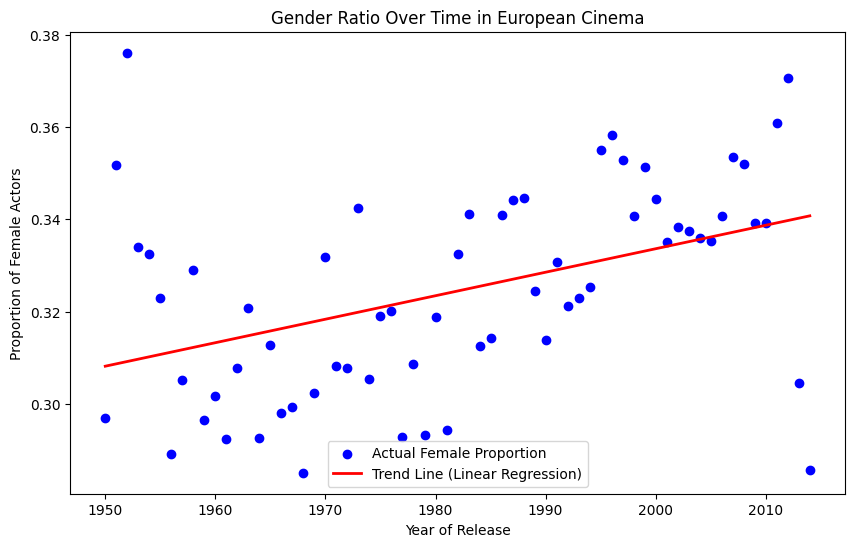

Linear Regression Coefficients:
Intercept: -0.6841278571967171
Year Coefficient: 0.0005088845329283862


In [10]:
gender_OLS(europe_df)

## Gender Proportion Analysis

**Gender Proportions Across Genres and Real-World Comparison**

The gender proportions in European cinema highlight a clear imbalance. Men dominate almost every genre, with women often taking a back seat. For most genres, male actors consistently make up the majority, reflecting a bias in the film industry.

Here are some notable observations:
- **Family/Animation Genres:** These genres come closest to achieving gender balance, probably because they aim to portray more relatable family dynamics. Still, they don't fully reflect real-world gender proportions.
- **Action/Adventure and Sci-Fi:** Unsurprisingly, these genres show the largest gender gap, with male actors overwhelmingly leading. This aligns with the stereotype of men being action heroes or intellectuals saving the world.
- **Romance and Drama:** While you'd think these genres would be more balanced, they still lean toward male dominance, even in stories often centered on relationships and emotions.

When we compare this to real-world gender proportions, the contrast is hard to ignore. In real life, men and women are nearly equal in numbers, yet on-screen, women are often missing from the picture.

---

**Trends Over Time**

Looking at the changes over time, there’s some good news—but not much. The linear regression suggests that female representation has slowly increased since the 1950s. But "slowly" is the key word here. The R-squared value tells us that time alone doesn’t explain much of the change, so progress is happening, but it’s not as dramatic as it could be.

This gradual improvement likely reflects small societal changes, but the lack of significant progress shows how deeply rooted these inequalities are in the film industry. Even now, women are far from being equally represented.

---

**Gender Proportions Across Ethnicities**

From the radar chart comparing gender proportions across ethnicities, we see another layer of disparity:

- **Black Women:** Severely underrepresented in European cinema, with only ~20% female representation, meaning ~80% of Black roles are given to men. 
- **East Asian Women:** Interestingly, East Asian women have the closest gender ratio compared to other ethnicities, with ~42% female representation. While still not equal, it is significantly better than other groups.
- **Caucasian Women:** Caucasians women are in the average, which makes sense considering they are the majority.

This stark disparity in gender proportions across ethnicities suggests that women from certains minority backgrounds face even greater barriers in the European cinema industry. The human biases aren’t just about gender but are compounded by race and ethnicity.




In [11]:
radar_chart_plot(europe_df, ethnicities)